In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math


Comparison of methodologies

In [6]:
# initialize arr to fill
# set number of universes
num_uni= 100

# indices=[i*25 for i in range(100)]
indices=[0]

# reformat indices to string format used to save files
for i in range(len(indices)):
    indices[i]=f'{indices[i]:05d}'

# -2lnL dicts for test point, bf from grid, and bf from min
RDict_pt = {}
RDict_grid = {}
RDict_min = {}

# loop through text files and save to dict
for k in indices:
    print(k)
    pT_list=[]
    grid_list=[]
    min_list=[]
    with open("FCTests/chis_"+k+".txt","r") as chi:
        lines = chi.readlines()
        for i in range(num_uni):
            lines[i*3].strip() #grid
            lines[i*3+1].strip() # min
            lines[i*3+2].strip() # pt

            vals0 = lines[i*3].split(" ")
            vals1 = lines[i*3+1].split(" ")
            vals2 = lines[i*3+2].split(" ")
            
            for j in range(len(vals0)):
                grid_list.append(float(vals0[j]))
            for j in range(len(vals1)):
                min_list.append(float(vals1[j]))
            for j in range(len(vals2)):
                pT_list.append(float(vals2[j]))

#     save to dictionary        
    RDict_pt[k] = pT_list
    RDict_grid[k] = grid_list
    RDict_min[k] = min_list
    
print(RDict_pt)
print(RDict_grid)
print(RDict_min)

00000
{'00000': [167.004, 153.4, 157.482, 163.308, 161.99, 168.533, 161.206, 163.12, 174.889, 170.199, 169.455, 190.414, 160.051, 147.282, 153.522, 169.534, 165.316, 163.664, 171.041, 163.905, 160.01, 162.705, 164.741, 173.867, 156.551, 174.746, 165.39, 147.781, 160.602, 155.348, 168.012, 174.997, 163.659, 174.797, 173.401, 164.172, 154.151, 160.899, 157.503, 174.882, 182.103, 159.927, 165.246, 171.72, 153.974, 159.118, 157.655, 153.827, 154.102, 174.675, 184.49, 155.381, 166.516, 178.198, 174.055, 165.898, 170.525, 157.865, 151.655, 159.23, 163.515, 162.213, 169.294, 177.331, 160.136, 160.254, 169.652, 176.533, 159.301, 165.414, 160.879, 172.252, 168.203, 170.942, 171.398, 149.731, 162.771, 161.26, 170.724, 167.077, 154.786, 158.887, 167.832, 159.687, 169.445, 168.052, 165.857, 162.813, 178.318, 165.941, 184.443, 168.295, 159.651, 160.947, 157.367, 198.013, 181.967, 172.908, 159.639, 179.643]}
{'00000': [163.587, 149.239, 152.481, 161.137, 159.298, 166.148, 160.581, 162.429, 173.583, 

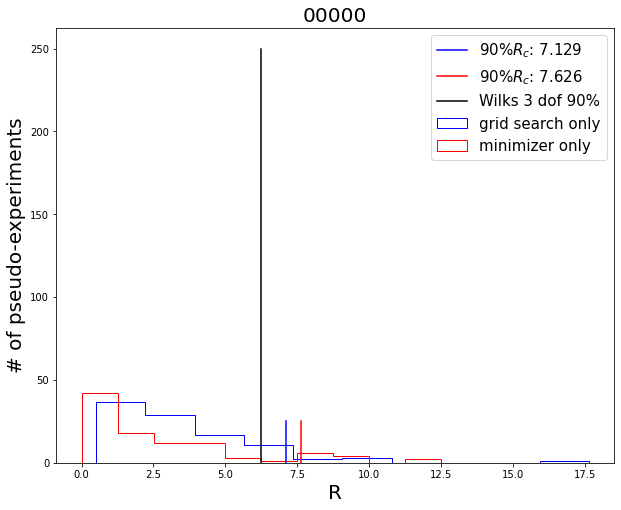

In [7]:
# look at each index individually
for i in RDict_grid:
    grid_list=RDict_grid[i]
    min_list=RDict_min[i]
    pT_list=RDict_pt[i]
    
    # make an R plot for each method
    delta_grid=[]
    delta_min=[]
    difference=[]

    for u in range(num_uni):
        delta_grid.append(pT_list[u]-grid_list[u])
        delta_min.append(pT_list[u]-min_list[u])
        difference.append(grid_list[u]-min_list[u])


    delta_grid.sort()
    val_90th_grid =delta_grid[math.floor(num_uni*.9)]
    delta_min.sort()
    val_90th_min =delta_min[math.floor(num_uni*.9)]


    # turn into histograms
    myrange=[0,50]
    fig,ax = plt.subplots(figsize=(10,8))
    plt.hist(delta_grid,bins=10,histtype='step',label="grid search only",color='blue')
    plt.plot([val_90th_grid,val_90th_grid],[0,25],color='blue',label=r'$90\% R_c$: '+str("%.3f" %val_90th_grid))
    plt.hist(delta_min,bins=10,histtype='step',label="minimizer only",color='red')
    plt.plot([val_90th_min,val_90th_min],[0,25],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
    plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
    plt.xlabel(r"R",fontsize=20)
    plt.ylabel(r"# of pseudo-experiments",fontsize=20)
    plt.title(str(i),fontsize=20)
    plt.legend(fontsize=15)
    plt.show()
    plt.close()

In [4]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC8542.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only
        
        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)
        
        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)
        
        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  16.5


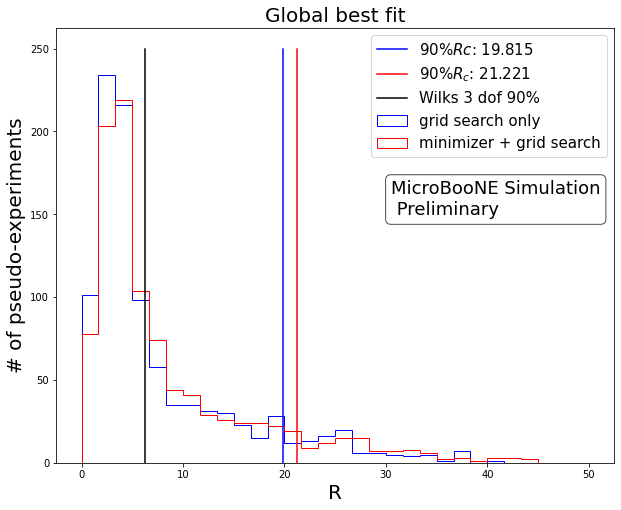

In [5]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 16.320):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)

    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Global best fit",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()


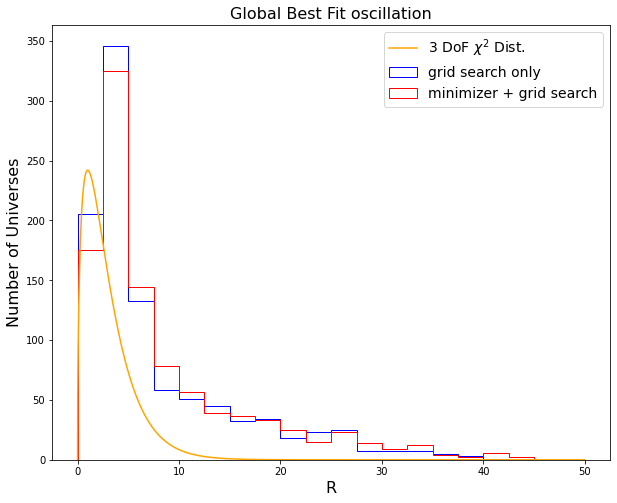

In [6]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])

    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


fig,ax = plt.subplots(figsize=(10,8))
# turn into histograms
plt.hist(delta_grid,bins=20,range=[0,50],histtype='step',label="grid search only",color='blue')
# plt.plot([val_90th_grid,val_90th_grid],[0,400],color='blue',label=r'$90\% R_c$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=20,range=[0,50],histtype='step',label="minimizer + grid search",color='red')
# plt.plot([val_90th_min,val_90th_min],[0,400],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
# plt.plot([6.25,6.25],[0,400],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=16)
plt.ylabel("Number of Universes",fontsize=16)
plt.title("Global Best Fit oscillation",fontsize=16)
hbins =[i*.01 for i in range(5000)]
clr = ['orange']
ndf=[3]
for df in ndf:
    ndf_chidist = chi2.pdf(hbins, df=df)
    ndf_chidist = (1000.)*ndf_chidist
    plt.plot(hbins, ndf_chidist,color=clr[(df-1)%len(clr)],label=str(df)+' DoF '+r'$\chi^2$ Dist.')

plt.legend(fontsize=14)
plt.show()
plt.close()


In [7]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC12992.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  10.5


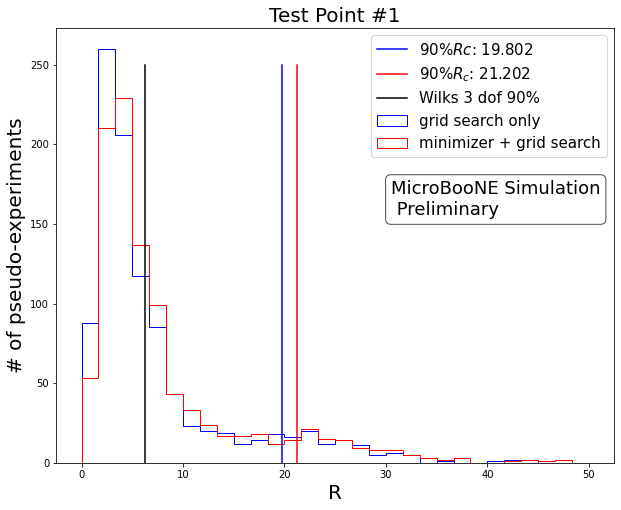

In [8]:
# pt 1
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 20.433):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)

    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Test Point #1",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()

In [9]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC9799.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  0.0


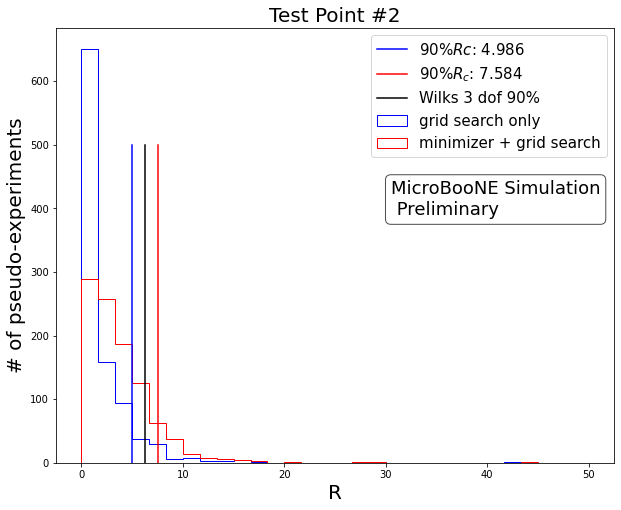

In [10]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 220.699):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)

    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,500],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,500],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,500],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Test Point #2",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()

In [11]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC15624.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  0.0


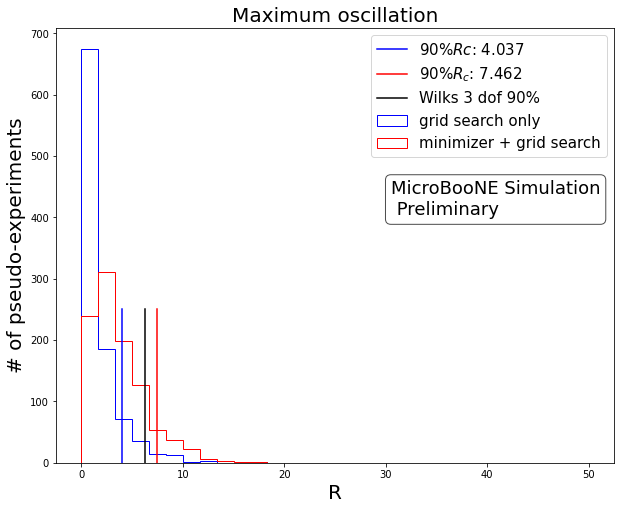

In [12]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 215.857):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)

    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Maximum oscillation",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()

In [13]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC9071.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  0.8999999999999999


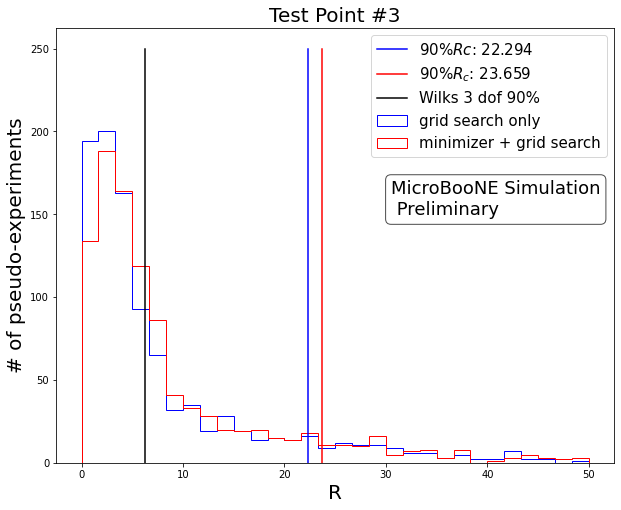

In [14]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 47.406):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)

    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Test Point #3",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()

In [15]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC7370.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  6.800000000000001


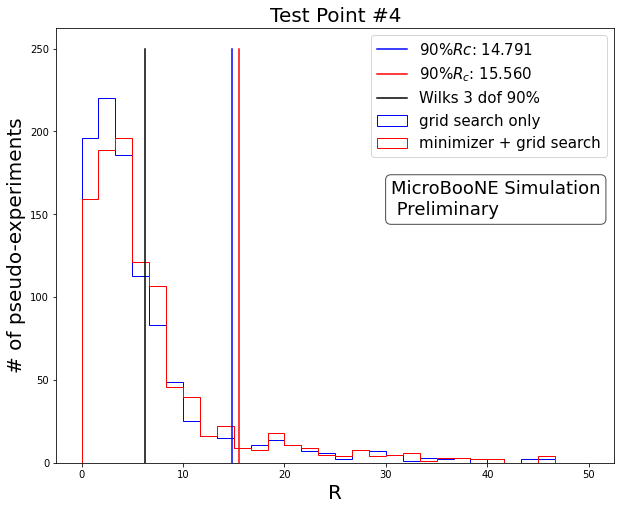

In [16]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 20.018):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)
 
    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Test Point #4",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()

In [17]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC10565.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

frac larger than data:  8.4


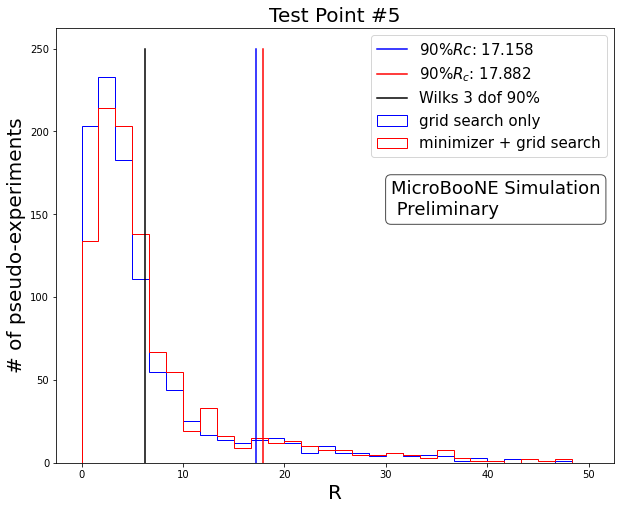

In [18]:
# make a delta chi2 plot for each method
delta_grid=[]
delta_min=[]

difference=[]

excluded =0
for i in range(num_uni):
#     print(pT_list[i][0],min_list[i][0])
    delta_grid.append(pT_list[i][0]-grid_list[i][0])
    delta_min.append(pT_list[i][0]-min_list[i][0])
    difference.append(grid_list[i][0]-min_list[i][0])
    if (pT_list[i][0]-min_list[i][0] > 20.406):
        excluded+=1
print("frac larger than data: ", float(excluded)/float(1000)*100)
    
delta_grid.sort()
val_90th_grid =delta_grid[math.floor(num_uni*.9)]
delta_min.sort()
val_90th_min =delta_min[math.floor(num_uni*.9)]


# turn into histograms
myrange=[0,50]
fig,ax = plt.subplots(figsize=(10,8))
plt.hist(delta_grid,range=myrange,bins=30,histtype='step',label="grid search only",color='blue')
plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% Rc$: '+str("%.3f" %val_90th_grid))
plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer + grid search",color='red')
plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
plt.xlabel(r"R",fontsize=20)
plt.ylabel(r"# of pseudo-experiments",fontsize=20)
plt.title("Test Point #5",fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.6, 0.65, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=15)
plt.show()
plt.close()

In [19]:
# initialize arr to fill
num_uni=int(3000/3)
pT_list=[]
grid_list=[]
min_list=[]
coarsemin_list=[]
finemin_list=[]

with open("chis_FC10600.txt","r") as chi:
    lines = chi.readlines()
    for i in range(num_uni):
        lines[i*3].strip() #PT
        lines[i*3+1].strip() #grid only
        lines[i*3+2].strip() #min only

        vals0 = lines[i*3].split(" ")
        vals1 = lines[i*3+1].split(" ")
        vals2 = lines[i*3+2].split(" ")
        testlist=[]
        for j in range(len(vals0)):
            testlist.append(float(vals0[j]))
        pT_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals1[j]))
        grid_list.append(testlist)

        testlist=[]
        for j in range(len(vals1)):
            testlist.append(float(vals2[j]))
        min_list.append(testlist)

IndexError: list index out of range

In [ ]:
colors=['red','blue','magenta','orange','brown','green','cyan','pink']
labels=['smallest osc','global best fit','largest osc','point #1','point #2','point #3','point #4','point #5']

with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))


m_vals=[m41_list[0], m41_list[13], m41_list[24], m41_list[20], m41_list[15], m41_list[14], m41_list[16], m41_list[11]]
ue_vals=[ue4_list[0], ue4_list[16], ue4_list[24], ue4_list[19], ue4_list[16], ue4_list[12], ue4_list[22], ue4_list[19]]
um_vals=[um4_list[0], um4_list[16], um4_list[24], um4_list[17], um4_list[24], um4_list[21], um4_list[15], um4_list[20],]

sinee_vals=[]
for u in range(len(ue_vals)):
    val=4*ue_vals[u]*ue_vals[u]*(1-ue_vals[u]*ue_vals[u])
    if val >=0.0001:
        sinee_vals.append(val)
    else:
        sinee_vals.append(0.0001)
        
sinmm_vals=[]
for u in range(len(ue_vals)):
    val=4*um_vals[u]*um_vals[u]*(1-um_vals[u]*um_vals[u])
    if val >=0.0001:
        sinmm_vals.append(val)
    else:
        sinmm_vals.append(0.0001)

sinme_vals=[]
for u in range(len(ue_vals)):
    val=4*um_vals[u]*um_vals[u]*ue_vals[u]*ue_vals[u]
    if val >=0.0001:
        sinme_vals.append(val)
    else:
        sinme_vals.append(0.0001)
        
fig,ax = plt.subplots(figsize=(10,8))
for i in range(len(ue_vals)):
    plt.scatter(sinee_vals[i],m_vals[i],color=colors[i],label=labels[i],marker='*',s=100)
plt.xlabel(r"$sin^2(\theta_{ee})$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
ax.set_ylim(0.01,100)
ax.set_xlim(0.0001,1)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('FC Test Points',fontsize=30)
plt.legend(fontsize=15)
plt.show()
plt.close()

fig,ax = plt.subplots(figsize=(10,8))
for i in range(len(ue_vals)):
    plt.scatter(sinmm_vals[i],m_vals[i],color=colors[i],label=labels[i],marker='*',s=100)
plt.xlabel(r"$sin^2(\theta_{\mu\mu})$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
ax.set_ylim(0.01,100)
ax.set_xlim(0.0001,1)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=15)
plt.title('FC Test Points',fontsize=30)
plt.show()
plt.close()

fig,ax = plt.subplots(figsize=(10,8))
for i in range(len(ue_vals)):
    plt.scatter(sinme_vals[i],m_vals[i],color=colors[i],label=labels[i],marker='*',s=100)
plt.xlabel(r"$sin^2(\theta_{\mu e})$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
ax.set_ylim(0.01,100)
ax.set_xlim(0.0001,1)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=15)
plt.title('FC Test Points',fontsize=30)
plt.show()
plt.close()